In [2]:
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [3]:
train_full_raw = pd.read_csv('/Users/edwina/Desktop/House_Pricing_Prediction/data/train.csv', index_col='Id')
train_full = train_full_raw.copy()

In [4]:
print(f"Train_full_raw.shape: {train_full.shape}")

Train_full_raw.shape: (1460, 80)


In [5]:
train_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_full.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


# Exploratory Data Analysis 

## Select Target Variable (SalePrice)

In [7]:
y = train_full['SalePrice'].copy()

## Visualiza  Target Variable (SalePrice)

=== Sale Price Fistribution Statistics ===
Average Sale Price: $180,921
Median Sale Price: $163,000
Standard Derivation of Sale Price: $79,443

=== Percentiles Analysis ===
25th percentile: $129,975
50th percentile: $163,000
75th percentile: $214,000
99th percentile: $442,567

Outlier (>340,038): 61 


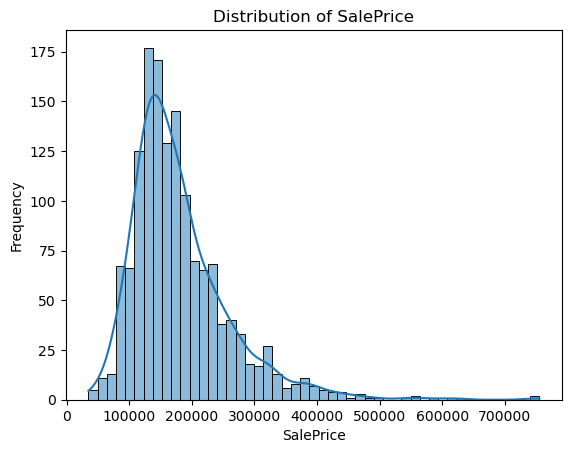

In [8]:
print("=== Sale Price Fistribution Statistics ===")
print(f"Average Sale Price: ${y.mean():,.0f}")
print(f"Median Sale Price: ${y.median():,.0f}")
print(f"Standard Derivation of Sale Price: ${y.std():,.0f}")
    
print("\n=== Percentiles Analysis ===")
percentiles = [25, 50, 75, 99]
for p in percentiles:
    value = np.percentile(y, p)
    print(f"{p}th percentile: ${value:,.0f}")
    
# Check for outliers
q1, q3 = np.percentile(y, [25, 75])
iqr = q3 - q1
outlier_threshold = q3 + 1.5 * iqr
outliers = y[y > outlier_threshold]
print(f"\nOutlier (>{outlier_threshold:,.0f}): {len(outliers)} ")

sns.histplot(y, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

The Distribution of `SalePrice` is right-skewd -> Apply log transformation using `np.log1p()` to make the data more normally distributed.

1. Lower the skewness for better model assumptions.

2. Decrease the impact of extreme values (e.g., luxury houses) on the model.

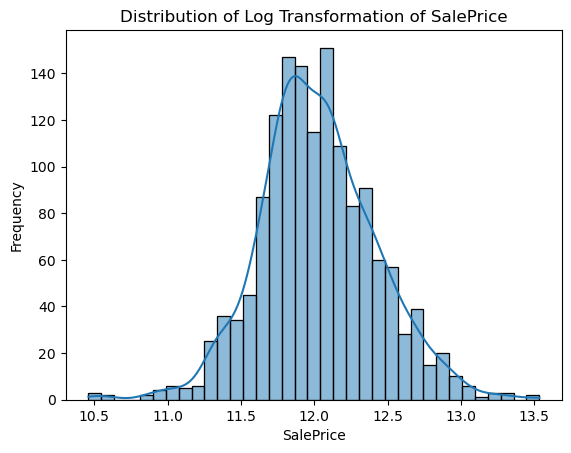

In [9]:
# log1p(x) avoids floating-point precision errors when x is near 0.
# y = np.log1p(y)

sns.histplot(np.log1p(y), kde=True)
plt.title('Distribution of Log Transformation of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.savefig("../images/EDA/target_distribution_log.png")
plt.show()

## Check for Missing Values & Visualize

In [10]:
missing_values_check = train_full.isnull().sum().sort_values(ascending=False)
missing_values_check[missing_values_check > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [11]:
missing_values_600 = missing_values_check[missing_values_check > 600]
missing_values_600

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
dtype: int64

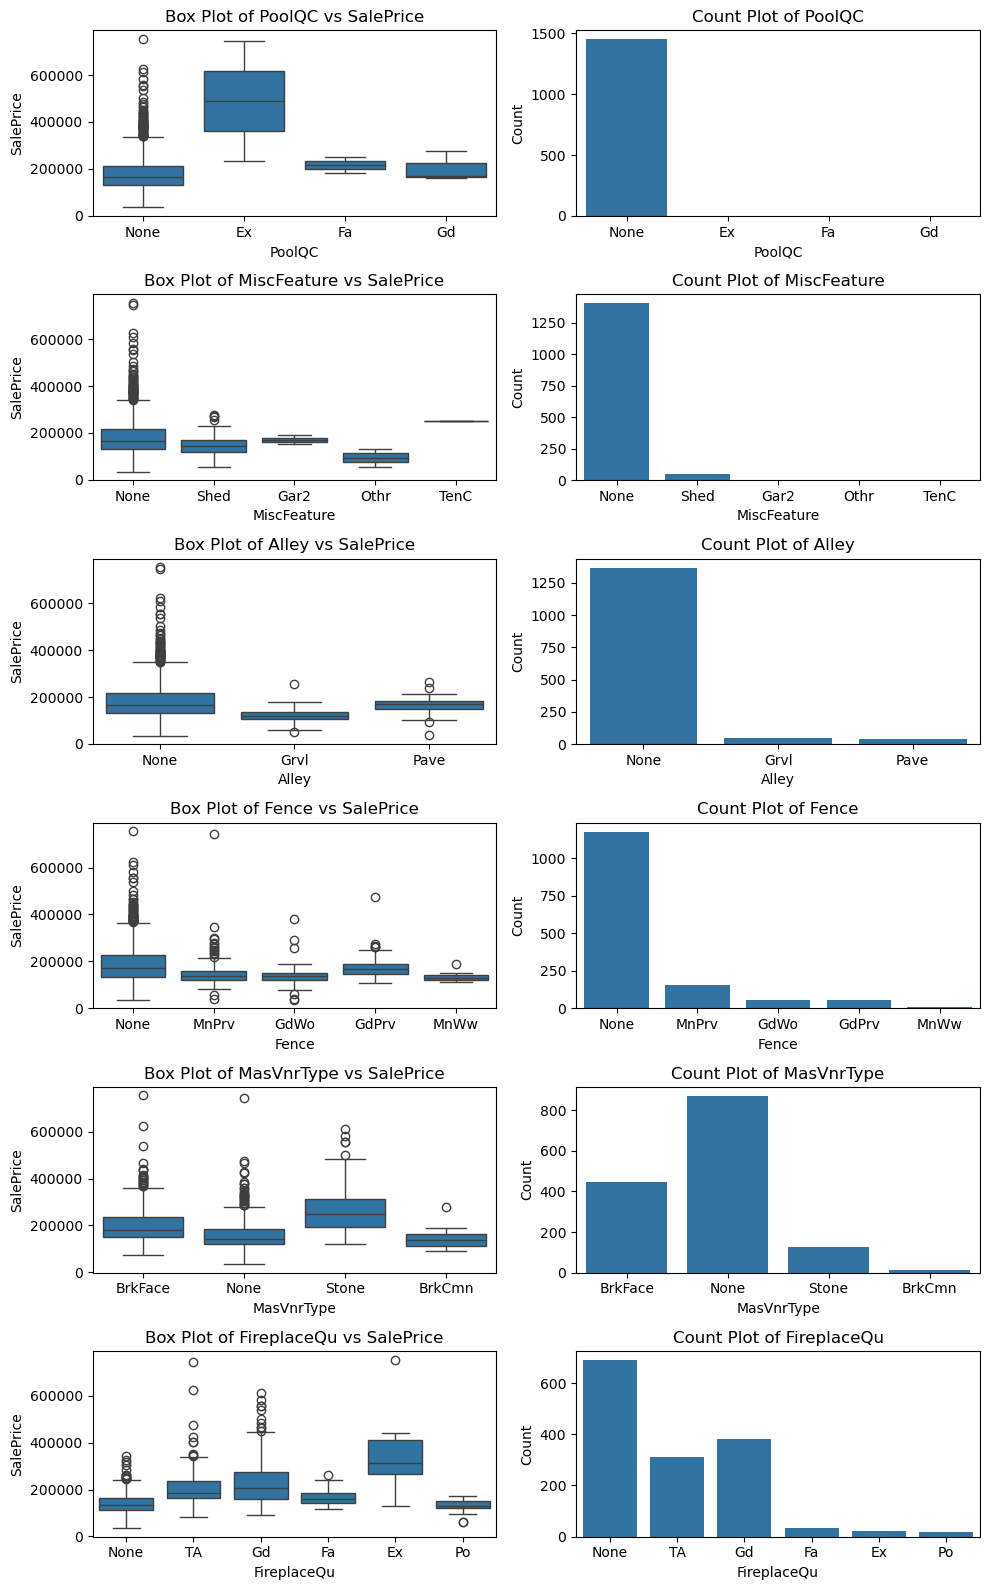

In [12]:
missing_values_600_list = missing_values_600.index.to_list()

fig, axes = plt.subplots(6, 2, figsize=(10, 16))  
axes = axes.flatten()  # Convert to a 1D array for easier indexing

for i, feature in enumerate(missing_values_600_list):
    sns.boxplot(x=train_full[feature].fillna('None'), y=y, ax=axes[2 * i])
    axes[2 * i].set_title(f"Box Plot of {feature} vs SalePrice")
    axes[2 * i].set_xlabel(feature)
    axes[2 * i].set_ylabel('SalePrice')

    sns.countplot(x=train_full[feature].fillna('None'), ax=axes[2 * i + 1])
    axes[2 * i + 1].set_title(f"Count Plot of {feature}")
    axes[2 * i + 1].set_xlabel(feature)
    axes[2 * i + 1].set_ylabel("Count")
    
plt.tight_layout()
plt.savefig("../images/EDA/box_count_missing_features.png")
plt.show()

### 📊 Handling Features with Missing Values

This figure shows **box plots (left)** and **count plots (right)** for categorical features with missing values. These visualizations guided decisions on customized preprocessing strategies for each feature group.

#### ✅ 1: Features with Quality Levels  
**Strategy: Impute Missing Values + Ordinal Encoding + Binary Indicator**

- **`PoolQC`**  
  Most houses lack pools, correlating with lower sale prices. Higher `PoolQC` scores indicate significantly higher prices.

- **`MasVnrType`**  
  Stone veneer types are associated with higher sale prices. Although categorical, this feature reflects material quality.

- **`FireplaceQu`**  
  Presence and quality of fireplaces impact sale price—higher quality fireplaces correspond to higher prices.

➡️ **Action**:  
- Impute missing values with `"None"`  
- Apply **ordinal encoding**  
- Add **binary indicators**: `HasPool`, `HasMasonryVeneer`, `HasFireplace`

---

#### ✅ 2: Features with Sparse Categories  
**Strategy: Impute Missing Values + Binary Indicator Only**

- **`MiscFeature`**  
  Rare and diverse (e.g., sheds, tennis courts), with minimal price impact.

- **`Alley`**  
  Sparse with no clear impact on sale prices.

- **`Fence`**  
  Slight quality gradation, but too sparse and inconsistent for encoding.

➡️ **Action**:  
- Impute missing values with `"None"`  
- Create **binary presence features**: `HasMiscFeature`, `HasAlley`, `HasFence`

---

#### ✅ 3: Low-Missing Features  
- **Numerical Features**: Impute using **mean**  
- **Categorical Features**: Impute using **most frequent value**


## Selected Categorical & Numerical Columns

In [13]:
categorical_cols = train_full_raw.select_dtypes(include='object').columns.tolist()
numerical_cols = train_full_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()

### Explore Numerical Features: Correlation

In [25]:
correlation = train_full[numerical_cols].corrwith(y).sort_values(ascending=False).reset_index()
correlation.columns = ['Features', 'Correlation']
correlation = correlation[correlation.index != y.name]
correlation

,Features,Correlation
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


In [28]:
top20 = correlation.reindex(correlation['Correlation'].abs().sort_values(ascending=False).head(20).index)

colors = ['steelblue' if x > 0 else 'lightcoral' for x in top20['Correlation']]

fig = px.bar(
    x=top20['Correlation'],
    y=top20['Features'],
    orientation='h',
    color=top20['Correlation'],
    color_continuous_scale=[
        [0.0, 'lightblue'],
        [0.5, 'dodgerblue'],
        [1.0, 'navy']
    ],
    title='Top 20 Features by Correlation Strength with SalePrice'
)

fig.update_traces(
    texttemplate='%{x:.2f}',
    textposition='outside',
    hovertemplate='<b>%{y}</b><br>Correlation: %{x:.4f}<extra></extra>'
)

fig.update_layout(
    width=900,
    height=750,
    xaxis_title='Correlation with SalePrice',
    yaxis_title='Features',
    margin=dict(l=100, r=80, t=80, b=50),
    coloraxis_colorbar=dict(title="Correlation<br>Strength")
)

fig.write_image("../images/EDA/correlation_with_saleprice.png", scale=2)
fig.show()

### Explore Categorical Features: Cardinality

**Cardinality of Categorical Features**

- High-cardinality categorical columns can impact model performance and need appropriate encoding strategies.

- **Cardinality alone is not a reason to drop features**, but it helps us decide **how to encode** them properly.


| Cardinality Range      | Encoding Strategy                                       | Remarks                              |
|------------------------|---------------------------------------------------------|--------------------------------------|
| **< 10**               | ✅ One-Hot Encoding                                     | Safe and effective for most models   |
| **10 – 30**            | 🔁 One-Hot (if needed) or Frequency Encoding / Grouping | Consider merging rare categories     |
| **> 30**               | 🎯 Target Encoding / Frequency Encoding / Rare Labeling | Avoid One-Hot due to high sparsity   |


In [16]:
cat_cardinality = train_full[categorical_cols].nunique().sort_values(ascending=False).reset_index()
cat_cardinality.columns = ['Feature', 'Cardinality']
cat_cardinality

,Feature,Cardinality
0,Neighborhood,25
1,Exterior2nd,16
2,Exterior1st,15
3,SaleType,9
4,Condition1,9
5,Condition2,8
6,HouseStyle,8
7,RoofMatl,8
8,Functional,7
9,BsmtFinType2,6


In [18]:
top_categorical = cat_cardinality.sort_values('Cardinality', ascending=False).head(20)

fig = px.bar(
    y=top_categorical['Feature'],
    x=top_categorical['Cardinality'],
    orientation='h',
    color=top_categorical['Cardinality'],
    color_continuous_scale=[
    [0.0, "#c3eec9"],   # seafoam
    [0.5, '#5cb270'],   # fresh green
    [1.0, '#184e3f']    # pine green
    ],
    title='Top 20 Categorical Features by Cardinality'
)

fig.update_traces(
    texttemplate='%{x}',
    textposition='outside',
    textfont_size=12
)

fig.update_layout(
    width=900,
    height=750,
    xaxis_title='Number of Unique Categories',
    yaxis_title='Categorical Features (Ranked by Cardinality)',
    margin=dict(l=120, r=80, t=80, b=50),
    legend=dict(title="Cardinality Level", x=1.02, y=1),
    coloraxis_colorbar=dict(title="Cardinality<br>Level")
)
fig.write_image("../images/EDA/cardinality_of_categorical_features.png", scale=2)
fig.show()

#### ✅ Cardinality Summary
`Neighborhood`, `Exterior2nd`, `Exterior1st`  -> Frequency Encodgin

`others` -> One-Hot Encoding
